In [2]:
import pandas as pd
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [3]:
lightning_data = pd.read_csv('tc_lightning_vis_data.csv')
threshold_data = pd.read_csv('tc_threshold.csv')
threshold_sum = pd.read_csv('threshold_summary.csv')

In [6]:
threshold_data.head()

,Unnamed: 0,time_bin,storm_code,lightning_count,year,month,day,hour,minute,lat,...,iqr1_threshold,iqr2_threshold,burst_mad1,burst_mad2,mad1_threshold,mad2_threshold,burst_logn1,burst_logn2,logn1_threshold,logn2_threshold
0,0,2010-06-26 09:00:00,ATL_10_1,2,2010,6,26,9,0,17.0,...,3.265439,3.908512,False,False,2.720473,3.125938,False,False,3.469047,4.444476
1,1,2010-06-26 09:30:00,ATL_10_1,13,2010,6,26,9,30,17.0,...,3.265439,3.908512,False,False,2.720473,3.125938,False,False,3.469047,4.444476
2,2,2010-06-26 13:00:00,ATL_10_1,2,2010,6,26,13,0,17.0,...,3.265439,3.908512,False,False,2.720473,3.125938,False,False,3.469047,4.444476
3,3,2010-06-26 13:30:00,ATL_10_1,1,2010,6,26,13,30,17.0,...,3.265439,3.908512,False,False,2.720473,3.125938,False,False,3.469047,4.444476
4,4,2010-06-26 14:30:00,ATL_10_1,1,2010,6,26,14,30,17.0,...,3.265439,3.908512,False,False,2.720473,3.125938,False,False,3.469047,4.444476


In [29]:
burst_counts = threshold_data.groupby('Intensification_Category_3')[['burst_iqr1','burst_iqr2','burst_logn1']].sum()

burst_counts = burst_counts.reset_index()
print(burst_counts)

  Intensification_Category_3  burst_iqr1  burst_iqr2  burst_logn1
0               Intensifying         350         103          415
1                    Neutral         171          47          256
2               Unidentified         149          50          159
3                  Weakening         175          50          222


In [38]:
# See if bursts statistically significant differences for each intensification
import scipy.stats as stats

methods = ['burst_iqr1', 'burst_iqr2', 'burst_logn1']


results = {}
for method in methods:
    observed = burst_counts[method].tolist()  # Get counts for the method across all stages
    chi2, p = stats.chisquare(observed)
    results[method] = {'Chi²': chi2, 'p-value': p}

for method in results:
    print(f"{method}: χ² = {results[method]['Chi²']:.2f}, p = {results[method]['p-value']:.4f}")


burst_iqr1: χ² = 123.36, p = 0.0000
burst_iqr2: χ² = 35.09, p = 0.0000
burst_logn1: χ² = 135.55, p = 0.0000


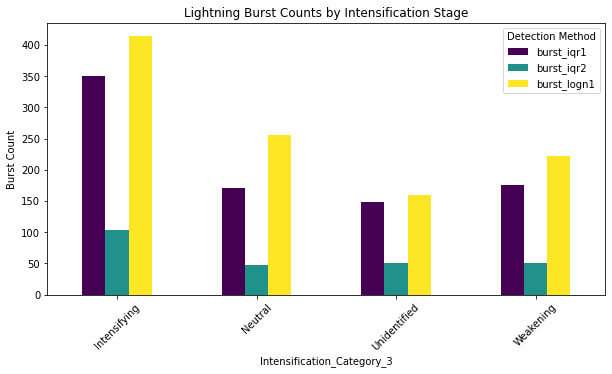

In [13]:
burst_counts.set_index("Intensification_Category_3").plot(kind="bar", figsize=(10, 5), colormap="viridis")
plt.ylabel("Burst Count")
plt.title("Lightning Burst Counts by Intensification Stage")
plt.legend(title="Detection Method")
plt.xticks(rotation=45)
plt.show()


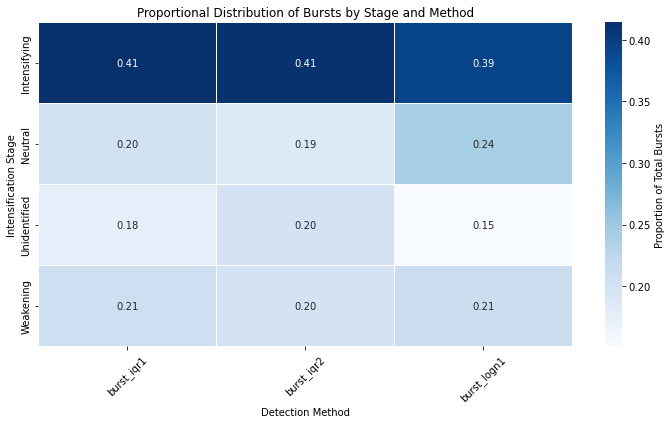

In [34]:
# Normalize data to show proportions within each method
df_normalized = burst_counts.set_index('Intensification_Category_3').apply(lambda x: x/x.sum(), axis=0)

# Plotting
plt.figure(figsize=(10, 6))
sns.heatmap(df_normalized, 
            annot=True, 
            fmt=".2f", 
            cmap='Blues', 
            linewidths=0.5,
            cbar_kws={'label': 'Proportion of Total Bursts'})
plt.title('Proportional Distribution of Bursts by Stage and Method')
plt.xlabel('Detection Method')
plt.ylabel('Intensification Stage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()